# K-means Clustering

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
# Set variables
data_num = 1000
cluster_num = 3
train_step_num = 4
learning_rate = 0.3
rand_seed = 0
rand_param = [[0, 1, 0.6], [3, 0, 0.4], [2, 2, 1]]

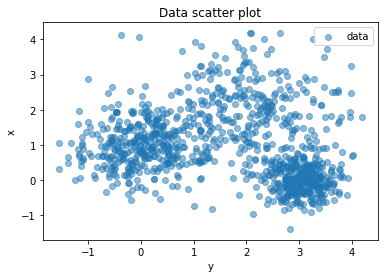

In [3]:
# Create data
np.random.seed(rand_seed)
data_list = []
for i in range(data_num):
    rand_data_param = rand_param[int(np.random.random() * cluster_num)]
    x = np.random.normal(rand_data_param[0], rand_data_param[2])
    y = np.random.normal(rand_data_param[1], rand_data_param[2])
    data_list.append([x, y])
    
x_data = np.asarray([data[0] for data in data_list])
y_data = np.asarray([data[1] for data in data_list])

# Plot x, y
plt.scatter(x_data, y_data, alpha=0.5)
plt.title("Data scatter plot")
plt.legend(["data"])
plt.ylabel("x")
plt.xlabel("y")

In [4]:
# Create tensorflow constants
data_tf = tf.constant(data_list)

# Set initial centroids
data_shuffle = tf.random_shuffle(data_tf, seed=rand_seed)
data_slice = tf.slice(data_shuffle, [0, 0], [cluster_num, -1])
data_centroids = tf.Variable(data_slice)

# Expand for broadcasting
data_expand = tf.expand_dims(data_tf, 0)
data_centroids_expand = tf.expand_dims(data_centroids, 1)

# Assign new cluster
data_diff = tf.subtract(data_expand, data_centroids_expand)
data_square = tf.square(data_diff)
data_distance_square = tf.reduce_sum(data_square, 2)
data_cluster = tf.argmin(data_distance_square, 0)

# Calculate means
means_list = []
for k in range(cluster_num):
    cluster_equal = tf.equal(data_cluster, k)
    cluster_where = tf.where(cluster_equal)
    cluster_reshape = tf.reshape(cluster_where, [1, -1])
    cluster_gather = tf.gather(data_tf, cluster_reshape)
    cluster_mean = tf.reduce_mean(cluster_gather, reduction_indices=[1])
    means_list.append(cluster_mean)

cluster_means = tf.concat(means_list, 0)

# Update centroids
update_centroids = tf.assign(data_centroids, cluster_means)

# Init and create session
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

In [5]:
# Train
cluster_list = []
for step in range(train_step_num):
    _, step_cluster, step_centroids = sess.run([update_centroids, data_cluster, data_centroids])
    cluster_list.append([step_cluster, step_centroids])

In [6]:
# Create simple draw function
def simpleClusterGraph(cluster_list, iter_num, cluster_num, ax, centroid_color="kgm", cluster_color = "bry", alpha=0.5):
    iter_cluster = cluster_list[iter_num-1]
    legend_list = []
    for k in range(cluster_num):
        # Draw clusters
        cluster_index = np.where(iter_cluster[0] == k)
        cluster_x = x_data[cluster_index]
        cluster_y = y_data[cluster_index]
        ax.scatter(cluster_x, cluster_y, color=cluster_color[k], alpha=alpha)
        legend_list.append("cluter {}".format(k))

        # Draw Centroids
        centroid_list = iter_cluster[1]
        ax.scatter(centroid_list[k][0], centroid_list[k][1], color=centroid_color[k], s=100)
        legend_list.append("centroid {}".format(k))
    
    ax.set_title("Iter {}".format(iter_num))
    ax.legend(legend_list)
    ax.set_xlabel("x")
    ax.set_xlabel("y")

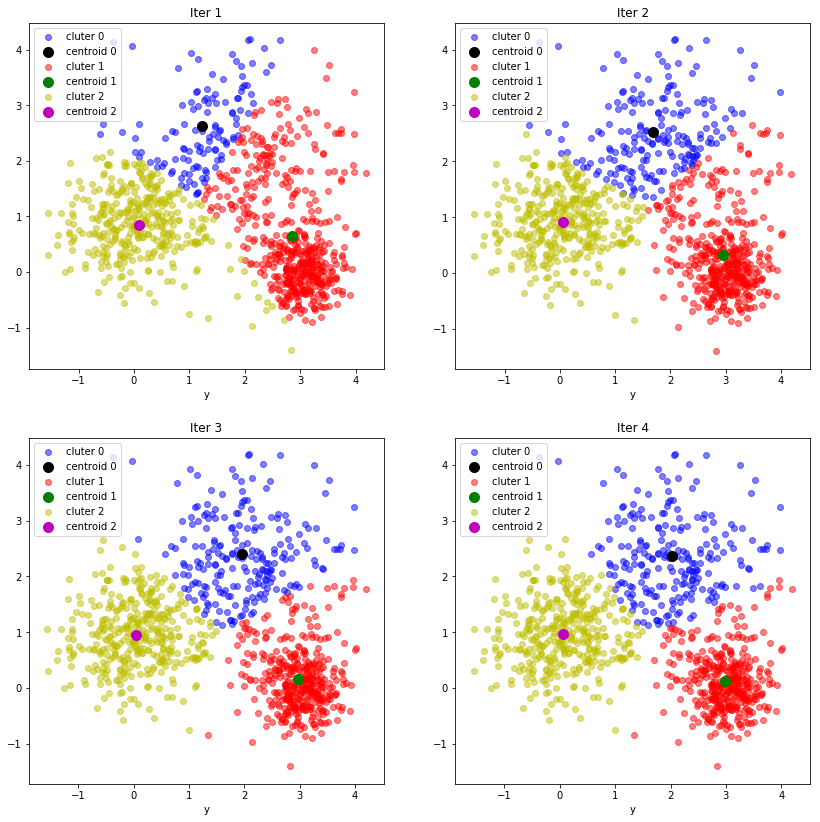

In [7]:
# Draw cluster
fig, ax = plt.subplots(2, 2, figsize=(14,14))
simpleClusterGraph(cluster_list, 1, cluster_num, ax[0, 0])
simpleClusterGraph(cluster_list, 2, cluster_num, ax[0, 1])
simpleClusterGraph(cluster_list, 3, cluster_num, ax[1, 0])
simpleClusterGraph(cluster_list, 4, cluster_num, ax[1, 1])